# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

The dataset can be downloaded from its original location [here](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset), its location [at Udacity](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip) or from the [Project start](https://github.com/sunsided/CarND-Traffic-Sign-Classifier-Project/releases/tag/project-start) release tag.

In [1]:
import pickle
import os

training_file = os.path.join('dataset', 'train.p')
validation_file= os.path.join('dataset', 'valid.p')
testing_file = os.path.join('dataset', 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Let's inspect the data set sizes for the training, validation and test sets. The shape tuples likely represent `(batch, height, width, channels)`, giving some 35k images in the training set.

In [2]:
X_train.shape

(34799, 32, 32, 3)

In [3]:
X_valid.shape

(4410, 32, 32, 3)

In [4]:
X_test.shape

(12630, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

This sums up to about 52k images, which matches the description on the dataset page ("More than 50,000 images in total").

In [6]:
X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]

51839

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# How many unique classes/labels there are in the dataset.
classes = np.unique(y_train)
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Obtaining the label names

In [8]:
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [9]:
import csv
from collections import OrderedDict
from typing import Dict

def read_labels(filename: str='signnames.csv') -> Dict[int, str]:
    with open(filename, 'r') as f:
        reader = csv.DictReader(f, ['ClassId', 'SignName'])
        next(reader)  # skip the header row
        return OrderedDict({int(r['ClassId']): r['SignName'] for r in reader})
    
label_name_map = read_labels()
label_name_map

OrderedDict([(0, 'Speed limit (20km/h)'),
             (1, 'Speed limit (30km/h)'),
             (2, 'Speed limit (50km/h)'),
             (3, 'Speed limit (60km/h)'),
             (4, 'Speed limit (70km/h)'),
             (5, 'Speed limit (80km/h)'),
             (6, 'End of speed limit (80km/h)'),
             (7, 'Speed limit (100km/h)'),
             (8, 'Speed limit (120km/h)'),
             (9, 'No passing'),
             (10, 'No passing for vehicles over 3.5 metric tons'),
             (11, 'Right-of-way at the next intersection'),
             (12, 'Priority road'),
             (13, 'Yield'),
             (14, 'Stop'),
             (15, 'No vehicles'),
             (16, 'Vehicles over 3.5 metric tons prohibited'),
             (17, 'No entry'),
             (18, 'General caution'),
             (19, 'Dangerous curve to the left'),
             (20, 'Dangerous curve to the right'),
             (21, 'Double curve'),
             (22, 'Bumpy road'),
             (23, 'Slippery 

In [10]:
from typing import Iterable, List

def translate_label(xs: Iterable[int]) -> List[str]:
    global label_name_map
    if isinstance(xs, int):
        xs = [xs]
    return [label_name_map[x] for x in xs]

translate_label(0)

['Speed limit (20km/h)']

### Creating a Pandas data frame for data exploration

First, we're going to import Pandas. If a warning about changed datatype sizes occurs, see [this](https://github.com/ContinuumIO/anaconda-issues/issues/6678#issuecomment-337276215) issue comment on GitHub; in essence, it can be ignored.

In [11]:
import pandas as pd

In [12]:
def build_df(type: str, labels: List[int]) -> pd.DataFrame:
    df = pd.DataFrame(data={
        'Index': range(len(labels)),
        'Type': type, 
        'Label': labels, 
        'Label name': translate_label(labels)})
    df['Type'] = df['Type'].astype('category')
    df['Label'] = df['Label'].astype('category')
    df['Label name'] = df['Label name'].astype(str)
    return df

df_train = build_df('training', y_train)
df_valid = build_df('validation', y_valid)
df_test = build_df('test', y_test)

df = pd.concat([df_train, df_valid, df_test], ignore_index=True)

df.sample(n=10)

,Index,Label,Label name,Type
43293,4084,12,Priority road,test
24160,24160,7,Speed limit (100km/h),training
12345,12345,9,No passing,training
34444,34444,25,Road work,training
7115,7115,4,Speed limit (70km/h),training
42467,3258,36,Go straight or right,test
41794,2585,2,Speed limit (50km/h),test
18338,18338,10,No passing for vehicles over 3.5 metric tons,training
10655,10655,29,Bicycles crossing,training
693,693,31,Wild animals crossing,training


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [13]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Let's peek at a randomly selected image from each class.

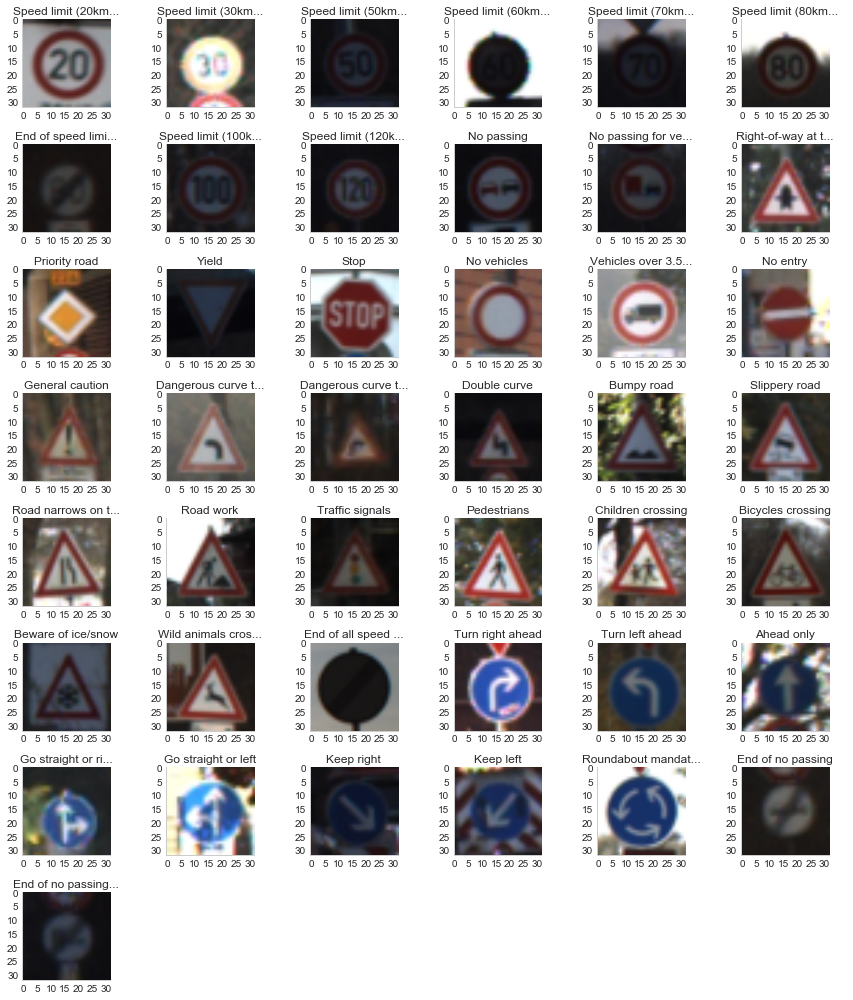

In [14]:
vis_cols = 6
vis_rows = int(np.ceil(n_classes / 6))
f, axs = plt.subplots(nrows=vis_rows, ncols=vis_cols, figsize=(12, 14))
for i, ax in enumerate(np.array(axs).flatten()):
    if i >= n_classes:
        ax.axis('off')
        continue
    sample = df_train[df_train['Label'] == i].sample(n=1)
    title = sample['Label name'].iloc[0]
    title = title if len(title) < 20 else (title[:17] + '...')
    img = X_train[sample.index.values[0]]
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('image')
    ax.grid(False)
plt.tight_layout()
sns.despine()
plt.savefig(os.path.join('images', 'class-samples.png'))

We can also inspect what the average training image looks like.

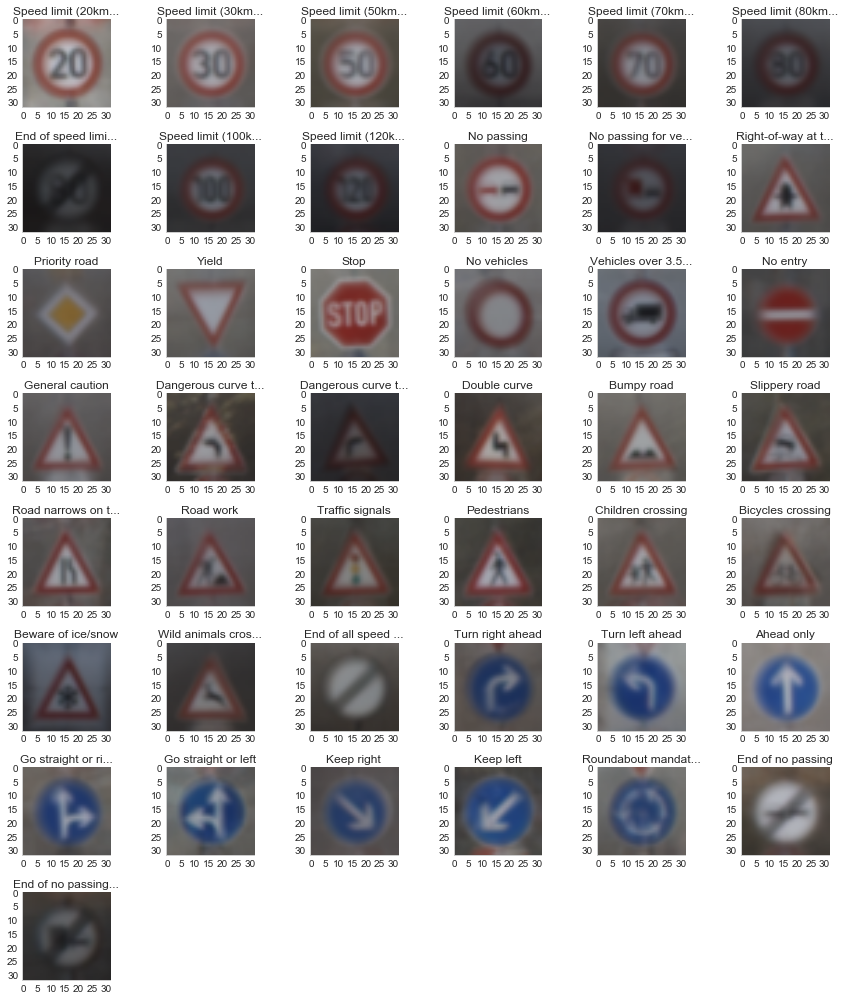

In [15]:
f, axs = plt.subplots(nrows=vis_rows, ncols=vis_cols, figsize=(12, 14))
for i, ax in enumerate(np.array(axs).flatten()):
    if i >= n_classes:
        ax.axis('off')
        continue
    sample = df_train[df_train['Label'] == i]
    title = sample['Label name'].iloc[0]
    title = title if len(title) < 20 else (title[:17] + '...')
    img = np.mean(X_train[sample.index.values].astype(np.float32), axis=0) / 255.
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('image')
    ax.grid(False)
plt.tight_layout()
sns.despine()
plt.savefig(os.path.join('images', 'class-means.png'))

Let's inspect the first couple of images per class.

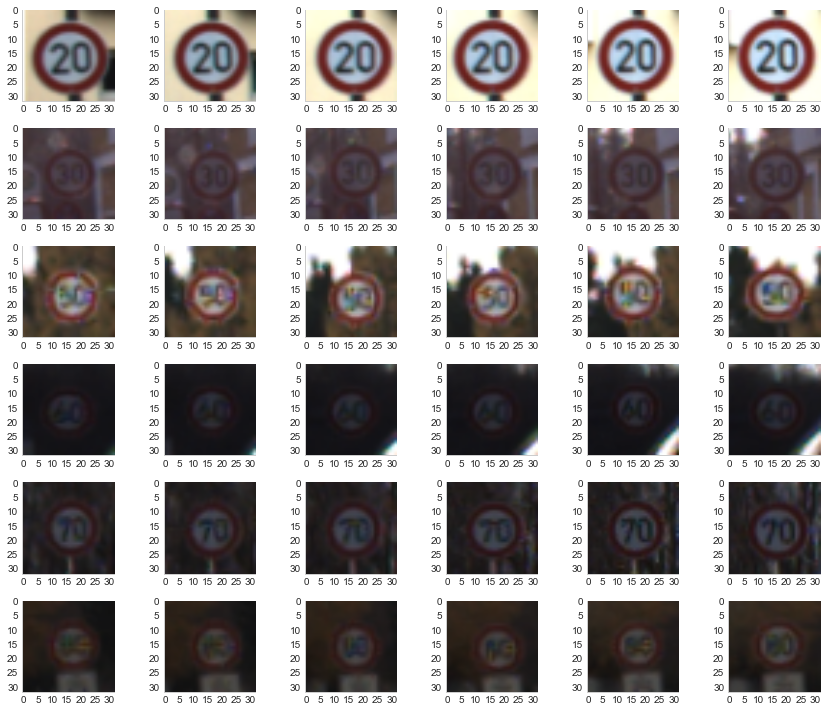

In [16]:
f, axs = plt.subplots(nrows=6, ncols=vis_cols, figsize=(12, 10))
for i, axs_ in enumerate(axs):
    sample = df_train[df_train['Label'] == i][:vis_cols]
    imgs = X_train[sample.index.values]
    for img, ax in zip(imgs, axs_):
        ax.imshow(img)
        ax.axis('image')
        ax.grid(False)
plt.tight_layout()
sns.despine()
plt.savefig(os.path.join('images', 'class-first.png'))

Overall, the images look pretty similar. From the slight variations in angle and position it could be assumed 
that they were created from a video sequence while driving past them.

What's interesting is the apparent difference in image quality between the last row (80km/h speed limit) and the others.

Let's take random samples of the same first classes to make sure we do actually have varying image appearances.

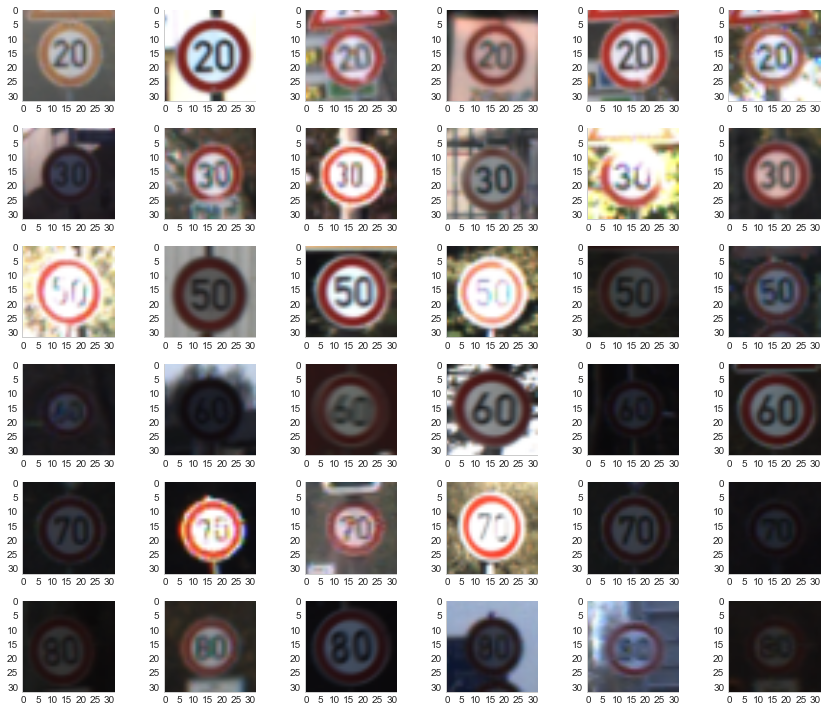

In [17]:
np.random.seed(0)
f, axs = plt.subplots(nrows=6, ncols=vis_cols, figsize=(12, 10))
for i, axs_ in enumerate(axs):
    sample = df_train[df_train['Label'] == i].sample(n=vis_cols)
    imgs = X_train[sample.index.values]
    for img, ax in zip(imgs, axs_):
        ax.imshow(img)
        ax.axis('image')
        ax.grid(False)
plt.tight_layout()
sns.despine()
plt.savefig(os.path.join('images', 'class-last.png'))

We do, but some of the images are pretty dark and/or bright. While we obviously want 
the network to be able to classify street signs correctly both at day and night, extreme shifts in intensity
are likely to slow down the learning process. It might be interesting to not just normalize the images 
using global statistics for training, but to instead make sure each image itself has zero mean and variance.

We can also think about class-specific normalization. If we inspect the mean image for 80km/h speed limits and 
30km/h speed limits, we'll find that they have massive differences in brightness.

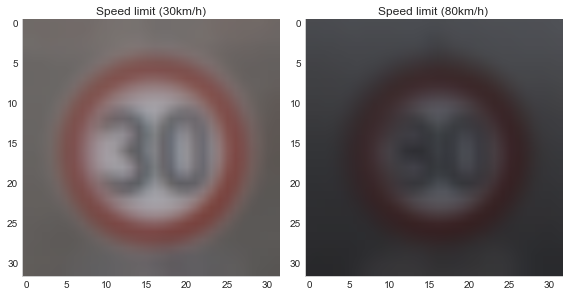

In [18]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

for c, ax in zip([1, 5], axs):
    sample = df_train[df_train['Label'] == c]
    title = sample['Label name'].iloc[0]
    img = np.mean(X_train[sample.index.values].astype(np.float32), axis=0) / 255.
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('image')
    ax.grid(False)

plt.tight_layout()
sns.despine()
plt.savefig(os.path.join('images', 'brightness-deviation.png'))

By this difference alone a classifier might be tempted to judge differently, especially given that both numbers appear to be quite similar. 
This is obviously dangerous, since a 30km/h speed limit should not be treated as an 80km/h limit just because it is darker outside.

Let's now see the distribution of examples per class in the training data set.

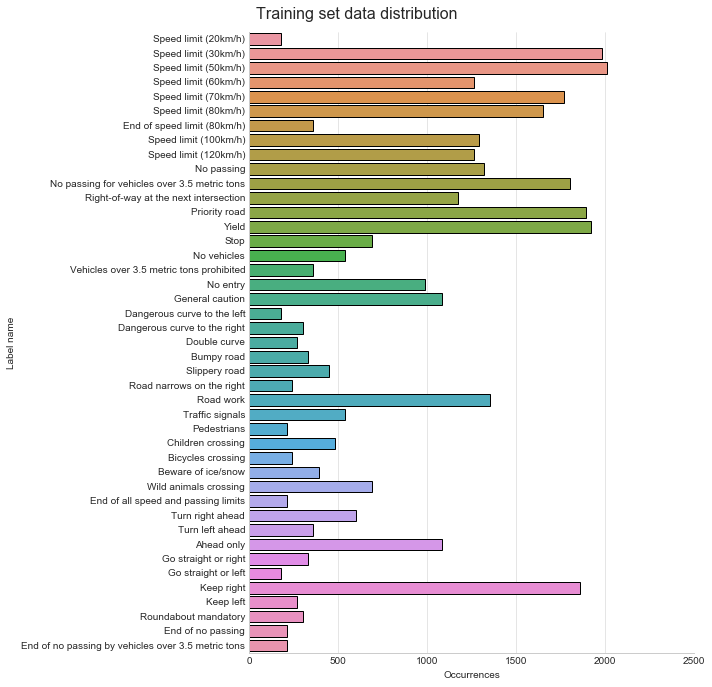

In [19]:
class_balance = df_train.groupby(['Label', 'Label name']).size()\
                .reset_index().set_index('Label')\
                .rename(columns={0: 'Occurrences'})

f, ax = plt.subplots(figsize=(10, 10))
f.suptitle('Training set data distribution', fontsize=16)
sns.barplot(y='Label name', x='Occurrences', data=class_balance, orient='h', ax=ax)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
sns.despine()
plt.savefig(os.path.join('images', 'class-distribution.png'))

In [20]:
class_balance.describe()

,Occurrences
count,43.000000
mean,809.279070
std,626.750855
min,180.000000
25%,285.000000
50%,540.000000
75%,1275.000000
max,2010.000000


We find that some classes are heavily underrepresented. Some classes have as few as `180` examples, while others have as many as `2010`, the median being at `540` examples. 
If trained using uniform sampling from the data set, we'll be heavily biasing the classifier towards some of the classes.

The same can be found in the validation and test data set (and, consequently, the whole corpus).

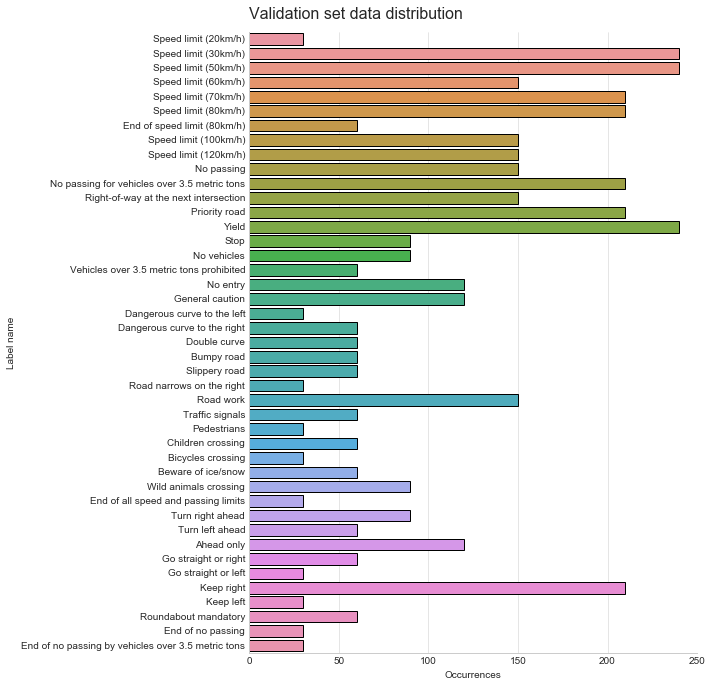

In [21]:
class_balance_v = df_valid.groupby(['Label', 'Label name']).size()\
                  .reset_index().set_index('Label')\
                  .rename(columns={0: 'Occurrences'})

f, ax = plt.subplots(figsize=(10, 10))
f.suptitle('Validation set data distribution', fontsize=16)
sns.barplot(y='Label name', x='Occurrences', data=class_balance_v, orient='h', ax=ax)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
sns.despine()

This implies that the training data wasn't just sampled unfortunately, but does really reflect the original (image) population statistics.
Although one would assume that some of the signs do, indeed, occur less often than others, there isn't much of 
a natural ranking in street sign importance. Put differently, we don't want to model the original population
statistics of street sign occurrences, but want a highly discriminative classifier.

For this, we might want to over- or undersample some of the classes.

By inspecting the values of the train, validation and test statistics, we find that the global statistics are approximately the same indeed.

In [22]:
def balance_stats(df: pd.DataFrame):
    balance = df.groupby(['Label', 'Label name']).size()\
                  .reset_index().set_index('Label')\
                  .rename(columns={0: 'Occurrences'})
    balance['Occurrences'] /= balance['Occurrences'].sum()
    return balance.describe()

In [23]:
balance_stats(df_train)

,Occurrences
count,43.000000
mean,0.023256
std,0.018011
min,0.005173
25%,0.008190
50%,0.015518
75%,0.036639
max,0.057760


In [24]:
balance_stats(df_valid)

,Occurrences
count,43.000000
mean,0.023256
std,0.015796
min,0.006803
25%,0.013605
50%,0.013605
75%,0.034014
max,0.054422


In [25]:
balance_stats(df_test)

,Occurrences
count,43.000000
mean,0.023256
std,0.018483
min,0.004751
25%,0.007126
50%,0.014252
75%,0.035629
max,0.059382


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

Since we're going to need TensorFlow, we're going to check its version upon importing.

In [26]:
import tensorflow as tf
tf.__version__

'1.10.1'

The original TensorFlow version meant to be used with this project was 0.12.1. 
However, as of writing this, the most recent TensorFlow version is 1.10 and I do like not to 
lag behind too much.

Since my system is using CUDA 9.1 and TensorFlow is still linked against CUDA 9.0, the notebook needed to be started using a custom `LD_LIBRARY_PATH` environment setting, e.g.

```bash
LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda-9.0/lib64 jupyter notebook
```

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Our baseline for preprocessing will be the simple normalization scheme described above, i.e. we convert 
the data to single-precision floating point and normalize into `-1 .. 1` range. As established above, it is very possible that this creates a 
bias due to the brightness differences per class, but we need something to start with - and, 
maybe, the bias isn't as bad after all.

In [27]:
def prepare_naive(x: np.ndarray) -> np.ndarray:
    x = x.astype(np.float32)
    return (x - 128) / 128

X_train_naive = prepare_naive(X_train)
X_valid_naive = prepare_naive(X_valid)
X_test_naive  = prepare_naive(X_test)

After this, we should find that the values are indeed spread out across the expected range.

In [28]:
X_train_naive.min(), X_train_naive.max()

(-1.0, 0.9921875)

And, we're still dealing with RGB color images.

In [29]:
X_train_naive.shape[-3:]

(32, 32, 3)

### Model Architecture

Again, the baseline will be a slightly adjusted variant of the LeNet implementation from the course materials first.

In [30]:
from typing import Tuple

KernelShape = Tuple[int, int, int, int]
StrideDef = Tuple[int, int, int, int]

In [31]:
from tensorflow.contrib.layers import flatten

def LeNet(x, mu: float=0, sigma: float=0.1):       
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1   = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1   = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2   = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2   = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0     = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W   = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b   = tf.Variable(tf.zeros(120))
    fc1     = tf.matmul(fc0, fc1_W) + fc1_b
    fc1     = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W   = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b   = tf.Variable(tf.zeros(84))
    fc2     = tf.matmul(fc1, fc2_W) + fc2_b
    fc2     = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 44.
    fc3_W   = tf.Variable(tf.truncated_normal(shape=(84, 44), mean=mu, stddev=sigma))
    fc3_b   = tf.Variable(tf.zeros(44))
    logits  = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

We define the placeholders for feeding the training data and the expected values. Note that we're expanding to 
`44` classes as we want to introduce and extra "background" class for the SoftMax loss.

In [33]:
n_classes + 1

44

In [34]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes + 1)

We now build a graph, define the loss and create the optimizer instance. Here, we're using Adam since it is
expected to be faster than standard SGD (and others) due to its adaptive nature.

In [35]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

We can now define our accuracy metrics:

In [36]:
predictions = tf.nn.softmax(logits)
top_predictions = tf.nn.top_k(predictions, k=5)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

We use an evaluation function to obtain an accuracy metric. Here, accuracy is defined as the 
fraction of correct predictions over all predictions.
It might later be interesting to obtain class-wise precision and recall metrics as well.

In [37]:
def evaluate(X_data: np.ndarray, y_data: np.ndarray, batch_size: int) -> float:
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        loss, accuracy = sess.run((loss_operation, accuracy_operation), feed_dict={x: batch_x, y: batch_y})
        total_loss += (loss * len(batch_x))
        total_accuracy += (accuracy * len(batch_x))
    return total_loss / num_examples, total_accuracy / num_examples

With this, we can now start training.

In [38]:
from sklearn.utils import shuffle

EPOCHS = 200
BATCH_SIZE = 32

In [39]:
saver = tf.train.Saver()

def train(X_train, y_train, X_valid, y_valid, path: str):
    train_acc, train_loss = [], []
    valid_acc, valid_loss = [], []

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        highest_accuracy, highest_epoch = 0, 0

        # Baseline accuracies (before any training)
        training_loss, training_accuracy = evaluate(X_train, y_train, BATCH_SIZE)
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid, BATCH_SIZE)
        train_acc.append(training_accuracy)
        valid_acc.append(validation_accuracy)
        train_loss.append(training_loss)
        valid_loss.append(validation_loss)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            training_loss, training_accuracy = evaluate(X_train, y_train, BATCH_SIZE)
            validation_loss, validation_accuracy = evaluate(X_valid, y_valid, BATCH_SIZE)
            train_acc.append(training_accuracy)
            valid_acc.append(validation_accuracy)
            train_loss.append(training_loss)
            valid_loss.append(validation_loss)

            if validation_accuracy > highest_accuracy:
                saver.save(sess, path)
                highest_accuracy = validation_accuracy
                highest_epoch = i
            print("EPOCH {} ... Validation Accuracy = {:.3f} (highest = {:.3f}, epoch {})"\
                  .format(i +1, validation_accuracy, highest_accuracy, highest_epoch), end='\r')
        print()
    return highest_accuracy, train_acc, valid_acc, train_loss, valid_loss

path = os.path.join('models', 'lenet', 'lenet')
results = train(X_train_naive, y_train, X_valid_naive, y_valid, path)
highest_accuracy, train_acc, valid_acc, train_loss, valid_loss = results

Training...

EPOCH 200 ... Validation Accuracy = 0.952 (highest = 0.961, epoch 58)


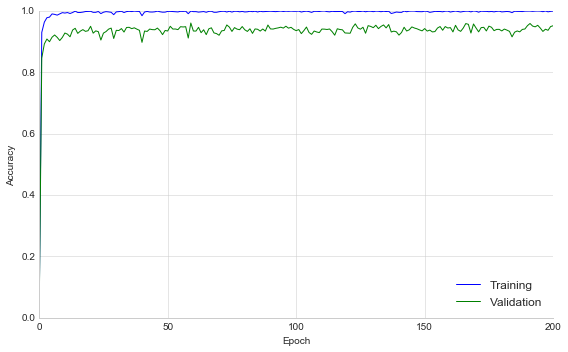

In [40]:
def plot_accuracies(train_acc: List[float], valid_acc: List[float]):
    f, ax = plt.subplots(figsize=(8, 5))
    ax.plot(np.arange(len(train_acc)), train_acc)
    ax.plot(np.arange(len(valid_acc)), valid_acc)
    ax.legend(['Training', 'Validation'], loc='lower right')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    plt.tight_layout()
    sns.despine()
    
plot_accuracies(train_acc, valid_acc)

We find that the training and validation accuracies qucikly climb to a high value and then only slightly - or not at all - improve.
Let's now look at the actual losses to judge the training process.

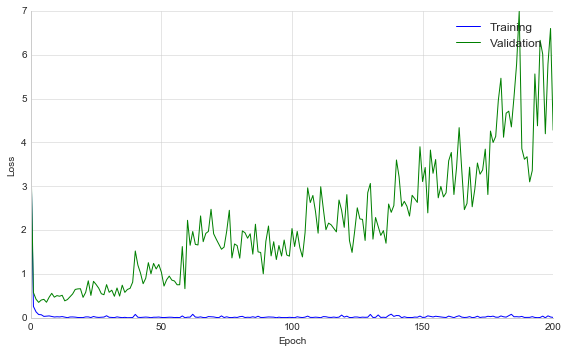

In [71]:
def plot_losses(train_loss: List[float], valid_loss: List[float]):
    f, ax = plt.subplots(figsize=(8, 5))
    ax.plot(np.arange(len(train_loss)), train_loss)
    ax.plot(np.arange(len(valid_loss)), valid_loss)
    ax.legend(['Training', 'Validation'], loc='upper right')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    plt.tight_layout()
    sns.despine()
    
plot_losses(train_loss, valid_loss)

As we already know from the training output, validation accuracy peaked at a somewhat early epoch.
The validation loss shows the entire picture: While training loss continued to decline (slowly), 
validation loss skyrocketed after some epochs. This is expected whenever the training begins to overfit on the 
training data.
In general, we can use this information to early-stop training, e.g. when we find that validation loss continues increasing. 

The core takeaway though is that even though we're just using a mostly off-the-shelf architecture with
trivial preprocessing, we are able to achieve a fairly high validation accuracy:

In [42]:
highest_accuracy

0.9605442175248853

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [43]:
import os
from typing import Optional

def read_test_image(name: str, path: str='test_signs', target_area: float=1024*768) -> np.ndarray:
    img = cv2.imread(os.path.join(path, name))
    area = np.prod(img.shape[:2])
    if area > target_area:
        scale = target_area / area
        img = cv2.resize(img, (0, 0), fx=scale, fy=scale)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def imshow(img: np.ndarray, title: Optional[str]=None):
    plt.imshow(img)
    plt.grid('off')
    if title is not None:
        plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    sns.despine()
    
def resize(img: np.ndarray) -> np.ndarray:
    return cv2.resize(img, (32, 32))

Here's a selection of traffic signs.

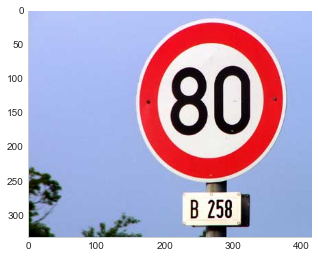

In [44]:
sign_80 = read_test_image('80.jpg')
imshow(sign_80)

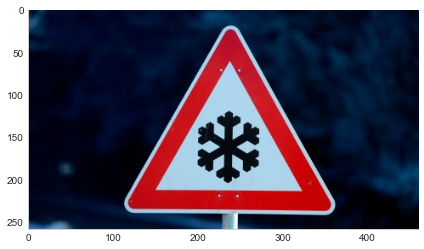

In [45]:
sign_glaette = read_test_image('glaette.jpg')
imshow(sign_glaette)

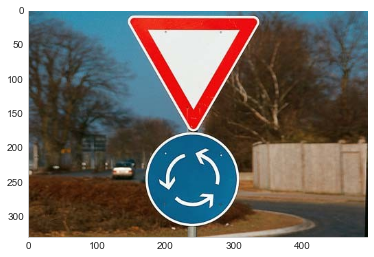

In [46]:
sign_kreis = read_test_image('kreisverkehr.jpg')
imshow(sign_kreis)

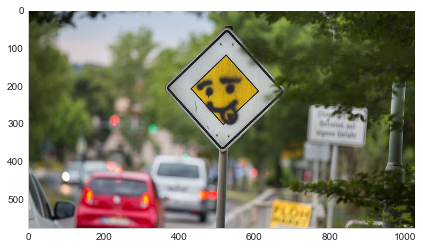

In [47]:
sign_priority = read_test_image('vorfahrt.jpg')
imshow(sign_priority)

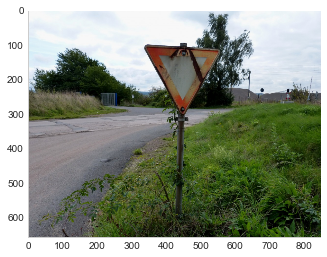

In [48]:
sign_yield = read_test_image('vorfahrt_beachten.jpg')
imshow(sign_yield)

For inference, we need to crop and resize them accordingly.

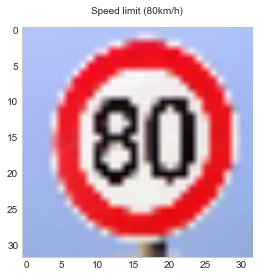

In [49]:
sign_80_small = resize(sign_80[0:270, 125:125+270, ...])
sign_80_small_y = 5
imshow(sign_80_small, label_name_map[sign_80_small_y])

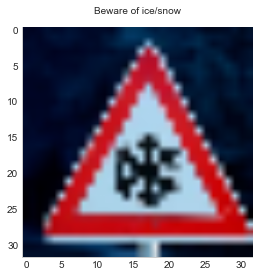

In [50]:
sign_glaette_small = resize(sign_glaette[0:300, 90:360, ...])
sign_glaette_small_y = 30
imshow(sign_glaette_small, label_name_map[sign_glaette_small_y])

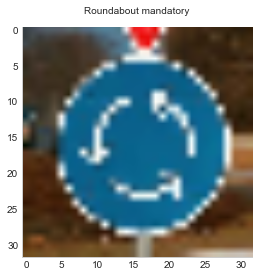

In [51]:
sign_kreis_small = resize(sign_kreis[155:335, 145:325, ...])
sign_kreis_small_y = 40
imshow(sign_kreis_small, label_name_map[sign_kreis_small_y])

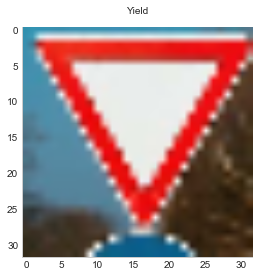

In [52]:
sign_yield_small = resize(sign_kreis[0:200, 135:335, ...])
sign_yield_small_y = 13
imshow(sign_yield_small, label_name_map[sign_yield_small_y])

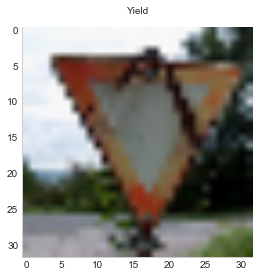

In [53]:
sign_yield2_small = resize(sign_yield[70:330, 305:565, ...])
sign_yield2_small_y = 13
imshow(sign_yield2_small, label_name_map[sign_yield2_small_y])

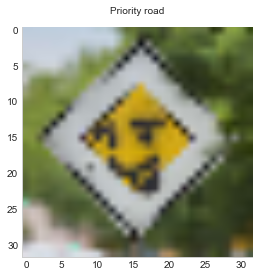

In [54]:
sign_priority_small = resize(sign_priority[25:405, 335:705, ...])
sign_priority_small_y = 12
imshow(sign_priority_small, label_name_map[sign_priority_small_y])

Next, we need to convert the images to micro-batches and prepare them for the network.

In [55]:
input_shape = (1, 32, 32, 3)

X_sample = np.vstack([
    prepare_naive(sign_80_small.reshape(input_shape)),
    prepare_naive(sign_glaette_small.reshape(input_shape)),
    prepare_naive(sign_kreis_small.reshape(input_shape)),
    prepare_naive(sign_yield_small.reshape(input_shape)),
    prepare_naive(sign_yield2_small.reshape(input_shape)),
    prepare_naive(sign_priority_small.reshape(input_shape))
])

y_sample = np.vstack([
    sign_80_small_y,
    sign_glaette_small_y,
    sign_kreis_small_y,
    sign_yield_small_y,
    sign_yield2_small_y,
    sign_priority_small_y
]).squeeze()

X_sample.shape, y_sample.shape

((6, 32, 32, 3), (6,))

To make sure that it still works, here's a peek at the first entry after denormalizing.

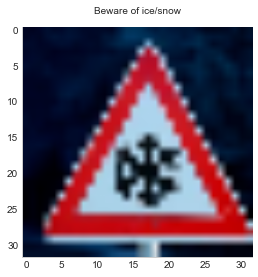

In [56]:
imshow((X_sample[1, ...] + 1) / 2, label_name_map[y_sample[1]])

In [57]:
X_sample[1, ...].min(), X_sample[1, ...].max()

(-1.0, 0.9140625)

### Predict the Sign Type for Each Image

In [58]:
load_path = os.path.join('models', 'lenet')

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(load_path))
    sample_predictions = sess.run(predictions, feed_dict={x: X_sample}) 
    # Note that we can do this "offline" as well, but it's easier to do this way.
    sample_accuracy = evaluate(X_sample, y_sample, len(X_sample))

INFO:tensorflow:Restoring parameters from models/lenet/lenet


In [59]:
sample_predictions.shape

(6, 44)

In [60]:
sample_confidences = np.max(sample_predictions, axis=1)
sample_confidences

array([1.        , 0.61846185, 1.        , 1.        , 1.        ,
       1.        ], dtype=float32)

In [61]:
sample_labels = np.argmax(sample_predictions, axis=1)
sample_labels

array([ 2, 11, 40, 13, 13, 12])

In [62]:
def sample_summary(sample_predictions, y_sample):
    sample_labels = np.argmax(sample_predictions, axis=1)
    sample_confidences = np.max(sample_predictions, axis=1)
    n_correct = 0
    for p, c, l, y in [(p, c, l, y)
                    for (p, l, c, y) 
                    in zip(sample_predictions, sample_labels, sample_confidences, y_sample)]:
        correct = l == y
        n_correct += 1 if correct else 0
        correct_confidence = p[y]
        verdict = ' OK ' if correct else 'FAIL'
        reason = '' if correct else ' (expected "{}", is p={:.4f})'.format(label_name_map[y], correct_confidence)
        print('{} p={:.2f} {}{}'.format(verdict, c, label_name_map[l], reason))
    accuracy = n_correct / len(sample_predictions)
    print('\n{}/{} correct, accuracy {:.2f}'.format(n_correct, len(sample_predictions), accuracy))
        
sample_summary(sample_predictions, y_sample)

FAIL p=1.00 Speed limit (50km/h) (expected "Speed limit (80km/h)", is p=0.0000)
FAIL p=0.62 Right-of-way at the next intersection (expected "Beware of ice/snow", is p=0.3815)
 OK  p=1.00 Roundabout mandatory
 OK  p=1.00 Yield
 OK  p=1.00 Yield
 OK  p=1.00 Priority road

4/6 correct, accuracy 0.67


We find that we measure the same accuracy using the evaluation function.

In [63]:
print(sample_accuracy)

(4.2684855461120605, 0.6666666865348816)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [64]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(load_path))
    top_sample_predictions = sess.run(top_predictions, feed_dict={x: X_sample})

INFO:tensorflow:Restoring parameters from models/lenet/lenet


In [65]:
for i in range(len(y_sample)):
    print('Sample {}: {}'.format(i, label_name_map[y_sample[i]]))
    ps, ls = top_sample_predictions[0][i], top_sample_predictions[1][i]
    for p, l in zip(ps, ls):
        print('   - {:.2f} {}'.format(p, label_name_map[l]))

Sample 0: Speed limit (80km/h)
   - 1.00 Speed limit (50km/h)
   - 0.00 Speed limit (80km/h)
   - 0.00 Speed limit (20km/h)
   - 0.00 Speed limit (30km/h)
   - 0.00 Speed limit (60km/h)
Sample 1: Beware of ice/snow
   - 0.62 Right-of-way at the next intersection
   - 0.38 Beware of ice/snow
   - 0.00 Slippery road
   - 0.00 Double curve
   - 0.00 Children crossing
Sample 2: Roundabout mandatory
   - 1.00 Roundabout mandatory
   - 0.00 Speed limit (20km/h)
   - 0.00 Speed limit (30km/h)
   - 0.00 Speed limit (50km/h)
   - 0.00 Speed limit (60km/h)
Sample 3: Yield
   - 1.00 Yield
   - 0.00 Speed limit (20km/h)
   - 0.00 Speed limit (30km/h)
   - 0.00 Speed limit (50km/h)
   - 0.00 Speed limit (60km/h)
Sample 4: Yield
   - 1.00 Yield
   - 0.00 Keep right
   - 0.00 Speed limit (120km/h)
   - 0.00 Speed limit (50km/h)
   - 0.00 No vehicles
Sample 5: Priority road
   - 1.00 Priority road
   - 0.00 Speed limit (20km/h)
   - 0.00 Speed limit (30km/h)
   - 0.00 Speed limit (50km/h)
   - 0.00 Sp

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [66]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, preproc, activation_min=-1, activation_max=-1,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_input = preproc(image_input)
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('Feature map ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
        plt.grid('off')
    sns.despine()

In [67]:
# for op in tf.get_default_graph().get_operations():
#     print(str(op.name))

INFO:tensorflow:Restoring parameters from models/lenet/lenet


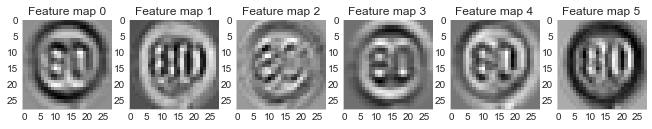

In [68]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(load_path))
    outputFeatureMap(image_input=X_sample[0].reshape((1, 32, 32, 3)), 
                     tf_activation=tf.get_default_graph().get_tensor_by_name('Conv2D:0'),
                     preproc=prepare_naive)

INFO:tensorflow:Restoring parameters from models/lenet/lenet


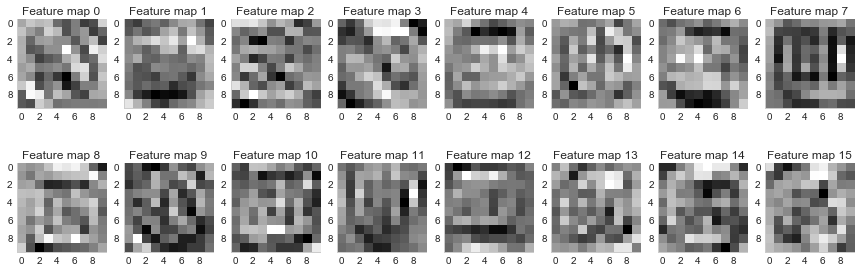

In [69]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(load_path))
    outputFeatureMap(image_input=X_sample[0].reshape((1, 32, 32, 3)), 
                     tf_activation=tf.get_default_graph().get_tensor_by_name('Conv2D_1:0'),
                     preproc=prepare_naive)